## Technical Analysis Exercise

Here is an exercise that you can use to practice using candlestick strategies with the TA-Lib library in Python:

**Exercise:**

Using the TA-Lib and yfinance libraries in Python, using the Python script that reads in historical stock data from Yahoo Finance for the given companies from Yahoo Finance and calculates the following candlestick patterns: Three Line Strike, Three Black Crows, Evening Star, Engulfing, Dragonfly Doji, Gravestone Doji, Tasukigap, Hammer, Dark Cloud Cover, and Piercing Line. Then, plot the stock data along with the calculated candlestick patterns.

Play with the period and the stock until you find some of the patterns.

Then, calculate the following metrics for the strategy:

* winning rate :
* Losing rate :
* maximum gain :
* maximum loss :
* average gain:
* average loss:
* expectancy:


In [1]:
# Download TA-Lib
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz

# Install from source
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
%cd ..

# Install TA-Lib python wrapper
!pip install TA-Lib


--2023-09-25 14:01:47--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-09-25 14:01:47--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://zenlayer.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-09-25 14:01:47--  http://zenlayer.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving zenlayer.dl.s

In [2]:
import pandas as pd
import numpy as np
import talib
import yfinance as yf
from datetime import date
import plotly.graph_objs as go

In [31]:
# stock data
stockticker = 'AAPL'
today = date.today().strftime("%Y-%m-%d")
df = yf.download(stockticker, start='2021-03-31', end=today)

[*********************100%%**********************]  1 of 1 completed


In [32]:
# Candlestick
open_data = df['Open']
high = df['High']
low = df['Low']
close = df['Adj Close']

pattern_functions = [
    talib.CDL3LINESTRIKE, talib.CDL3BLACKCROWS, talib.CDLEVENINGSTAR,
    talib.CDLENGULFING, talib.CDLDRAGONFLYDOJI, talib.CDLGRAVESTONEDOJI,
    talib.CDLTASUKIGAP, talib.CDLHAMMER, talib.CDLDARKCLOUDCOVER, talib.CDLPIERCING
]

for func in pattern_functions:
    df[func.__name__] = func(open_data, high, low, close)


In [33]:
df

,Open,High,Low,Close,Adj Close,Volume,CDL3LINESTRIKE,CDL3BLACKCROWS,CDLEVENINGSTAR,CDLENGULFING,CDLDRAGONFLYDOJI,CDLGRAVESTONEDOJI,CDLTASUKIGAP,CDLHAMMER,CDLDARKCLOUDCOVER,CDLPIERCING
Date,,,,,,,,,,,,,,,,
2021-03-31,121.650002,123.519997,121.150002,122.150002,120.367882,118323800,0,0,0,0,0,0,0,0,0,0
2021-04-01,123.660004,124.180000,122.489998,123.000000,121.205475,75089100,0,0,0,0,0,0,0,0,0,0
2021-04-05,123.870003,126.160004,123.070000,125.900002,124.063171,88651200,0,0,0,0,0,0,0,0,0,0
2021-04-06,126.500000,127.129997,125.650002,126.209999,124.368645,80171300,0,0,0,0,0,0,0,0,0,0
2021-04-07,125.830002,127.919998,125.139999,127.900002,126.034004,83466700,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-18,176.479996,179.380005,176.169998,177.970001,177.970001,67257600,0,0,0,0,0,0,0,0,0,0
2023-09-19,177.520004,179.630005,177.130005,179.070007,179.070007,51826900,0,0,0,0,0,0,0,0,0,0
2023-09-20,179.259995,179.699997,175.399994,175.490005,175.490005,58436200,0,0,0,-100,0,0,0,0,0,0


In [41]:
# Strategy
df['signal'] = 0
for col in df.columns:
    if "CDL" in col:
        df['signal'] += df[col]

df['position'] = df['signal'].apply(lambda x:  1 if x > 0 else (-1 if x < 0 else 0))

df['entry'] = np.where(df['position'].shift(1)!=df['position'],np.where(df['position'].shift(1)==-1,1,-1),0)




In [42]:
df_entries = df.loc[df['entry']!=0]
df_entries = df_entries.dropna()
print(df_entries.shape)
df_entries.tail()

(115, 22)


,Open,High,Low,Close,Adj Close,Volume,CDL3LINESTRIKE,CDL3BLACKCROWS,CDLEVENINGSTAR,CDLENGULFING,...,CDLTASUKIGAP,CDLHAMMER,CDLDARKCLOUDCOVER,CDLPIERCING,Signal,Position,Market Return,Strategy Return,position,entry
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-02,195.039993,195.179993,191.850006,192.580002,192.320297,50389300,0,0,0,0,...,0,0,0,0,0,0,-0.015611,1.561122,0,1
2023-09-05,188.279999,189.979996,187.610001,189.699997,189.699997,45280000,0,0,0,100,...,0,0,0,0,100,1,0.001266,0.000000,1,-1
2023-09-06,188.399994,188.850006,181.470001,182.910004,182.910004,81755800,0,0,0,0,...,0,0,0,0,0,0,-0.036450,-3.644961,0,-1
2023-09-20,179.259995,179.699997,175.399994,175.490005,175.490005,58436200,0,0,0,-100,...,0,0,0,0,-100,-1,-0.020195,-0.000000,-1,-1
2023-09-21,174.550003,176.300003,173.860001,173.929993,173.929993,63047900,0,0,0,0,...,0,0,0,0,0,0,-0.008929,0.892922,0,1


In [44]:
df_entries['return'] = np.log(df_entries['Close']/df_entries['Close'].shift(1))  #log_returns
df_entries['strategy_return'] = df_entries['return'] * df_entries['position'].shift(1) #log_returns
#df_entries = df_entries.dropna()
df_entries.head()

,Open,High,Low,Close,Adj Close,Volume,CDL3LINESTRIKE,CDL3BLACKCROWS,CDLEVENINGSTAR,CDLENGULFING,...,CDLDARKCLOUDCOVER,CDLPIERCING,Signal,Position,Market Return,Strategy Return,position,entry,return,strategy_return
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-05,123.870003,126.160004,123.070000,125.900002,124.063171,88651200,0,0,0,0,...,0,0,0,0,0.023304,0.000000,0,-1,NaN,NaN
2021-04-12,132.520004,132.850006,130.630005,131.240005,129.325272,91420000,0,0,0,-100,...,0,0,-100,-1,-0.013321,-0.000000,-1,-1,0.041540,0.000000
2021-04-13,132.440002,134.660004,131.929993,134.429993,132.468719,91266500,0,0,0,0,...,0,0,0,0,0.024016,-2.401581,0,1,0.024016,-0.024016
2021-04-14,134.940002,135.000000,131.660004,132.029999,130.103745,87222800,0,0,0,-100,...,0,0,-100,-1,-0.018014,-0.000000,-1,-1,-0.018014,-0.000000
2021-04-15,133.820007,135.000000,133.639999,134.500000,132.537720,89347100,0,0,0,0,...,0,0,0,0,0.018535,-1.853504,0,1,0.018535,-0.018535


In [45]:
df_entries['cum_strat_ret'] = (1+df_entries['strategy_return']).cumprod()
df_entries = df_entries.dropna()
df_entries

,Open,High,Low,Close,Adj Close,Volume,CDL3LINESTRIKE,CDL3BLACKCROWS,CDLEVENINGSTAR,CDLENGULFING,...,CDLPIERCING,Signal,Position,Market Return,Strategy Return,position,entry,return,strategy_return,cum_strat_ret
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-12,132.520004,132.850006,130.630005,131.240005,129.325272,91420000,0,0,0,-100,...,0,-100,-1,-0.013321,-0.000000,-1,-1,0.041540,0.000000,1.000000
2021-04-13,132.440002,134.660004,131.929993,134.429993,132.468719,91266500,0,0,0,0,...,0,0,0,0.024016,-2.401581,0,1,0.024016,-0.024016,0.975984
2021-04-14,134.940002,135.000000,131.660004,132.029999,130.103745,87222800,0,0,0,-100,...,0,-100,-1,-0.018014,-0.000000,-1,-1,-0.018014,-0.000000,0.975984
2021-04-15,133.820007,135.000000,133.639999,134.500000,132.537720,89347100,0,0,0,0,...,0,0,0,0.018535,-1.853504,0,1,0.018535,-0.018535,0.957894
2021-04-23,132.160004,135.119995,132.160004,134.320007,132.360321,78657500,0,0,0,0,...,0,100,1,0.017878,0.000000,1,-1,-0.001339,-0.000000,0.957894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-02,195.039993,195.179993,191.850006,192.580002,192.320297,50389300,0,0,0,0,...,0,0,0,-0.015611,1.561122,0,1,-0.015611,0.015611,1.038268
2023-09-05,188.279999,189.979996,187.610001,189.699997,189.699997,45280000,0,0,0,100,...,0,100,1,0.001266,0.000000,1,-1,-0.015068,-0.000000,1.038268
2023-09-06,188.399994,188.850006,181.470001,182.910004,182.910004,81755800,0,0,0,0,...,0,0,0,-0.036450,-3.644961,0,-1,-0.036450,-0.036450,1.000423


<ipython-input-47-ce01372d3c39>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'US$')

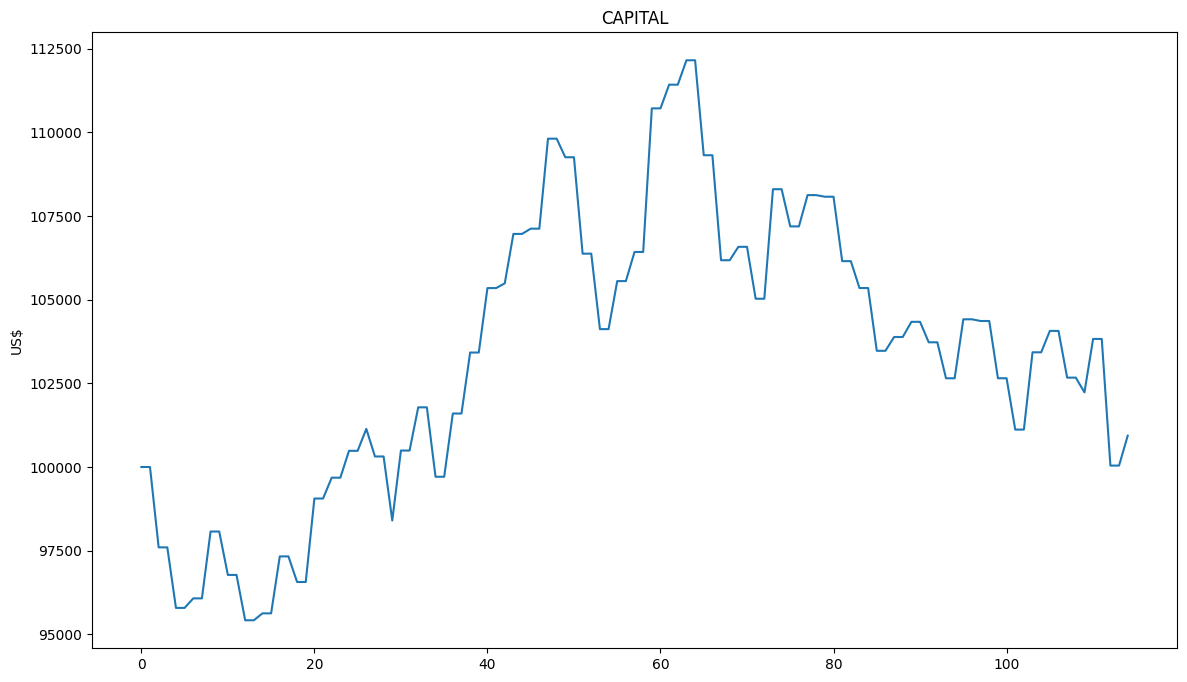

In [47]:
import matplotlib.pyplot as plt
initial_capital = 100000
df_entries['capital'] = initial_capital*df_entries['cum_strat_ret']
capital = [initial_capital]+ list(df_entries['capital'])

plt.figure(figsize=(14,8))
plt.plot(capital)
plt.title('CAPITAL')
plt.ylabel('US$')


In [48]:
winning_rate = len(df_entries[df_entries['strategy_return']>0])/len(df_entries)
losing_rate = 1 - winning_rate

profit_factor = df_entries

avg_gain = df_entries[df_entries['strategy_return']>0]['strategy_return'].mean()
max_gain = df_entries['strategy_return'].max()

avg_loss = df_entries[df_entries['strategy_return']<=0]['strategy_return'].mean()
max_loss = df_entries['strategy_return'].min()

expectancy = abs((winning_rate*avg_gain)/(losing_rate*avg_loss))

print("winning rate : {0:.2f} %".format(winning_rate*100))
print("Losing rate : {0:.2f} %".format(losing_rate*100))
print("maximum gain : {0:.2f} %".format(max_gain*100))
print("maximum loss : {0:.2f} %".format(max_loss*100))
print("average gain: {0:.2f} %".format(avg_gain*100))
print("average loss: {0:.2f} %".format(avg_loss*100))
print("expectancy: {0:.2f}".format(expectancy))


winning rate : 28.07 %
Losing rate : 71.93 %
maximum gain : 4.03 %
maximum loss : -3.64 %
average gain: 1.31 %
average loss: -0.49 %
expectancy: 1.04


Strategy Summary:

We utilized TA-Lib to detect key candlestick patterns in Apple's stock data. Our strategy acted on both bullish (e.g., "Three Line Strike") and bearish patterns (e.g., "Three Black Crows"). Bullish patterns prompted a 'Hold' or 'Buy' signal, while bearish patterns indicated 'Sell'. By combining multiple patterns, we aimed to capture a broader trading sentiment, maximizing potential returns. However, it's essential to always backtest strategies before real-world deployment.